# Principal Component Analysis (PCA)

**Goal**: PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space by projecting it onto directions (principal components) that maximize variance.

**Use Cases**:
- Data visualization (2D/3D projections)
- Noise reduction
- Feature extraction for downstream ML models
- Preprocessing for supervised learning

**Steps of PCA**:
1. Standardize the data
2. Compute the covariance matrix
3. Compute eigenvectors and eigenvalues
4. Sort eigenvectors by descending eigenvalues
5. Project the data onto the top k eigenvectors

**Key Concepts**:
- Covariance Matrix
- Eigenvalues and Eigenvectors
- Variance Explained / Scree Plot
- Whitening
- Kernel PCA (nonlinear extension)


## Introduction to PCA

Principal Component Analysis (PCA) is an unsupervised linear transformation technique used for dimensionality reduction. The main idea is to identify the axes (principal components) along which the variance in the data is maximized.

Let $X \in \mathbb{R}^{n \times d}$ be a centered data matrix with $n$ samples and $d$ features.

### Step-by-step:

1. **Standardization**:
   Center the data by subtracting the mean of each feature: $X_{centered} = X - \bar{X}$

2. **Covariance Matrix**:
   $$ \Sigma = \frac{1}{n - 1} X^\top X $$

3. **Eigen Decomposition**:
   Compute the eigenvalues $\lambda_i$ and eigenvectors $v_i$ of $\Sigma$, where:
   $$ \Sigma v_i = \lambda_i v_i $$

4. **Sort and Select Components**:
   Choose the top $k$ eigenvectors associated with the largest eigenvalues.

5. **Project Data**:
   The reduced representation is:
   $$ Z = X V_k $$
   where $V_k$ contains the top $k$ eigenvectors.

### Variance Explained:
To decide how many components to keep, we look at the proportion of total variance explained:
$$ \text{Explained Variance Ratio} = \frac{\lambda_i}{\sum_j \lambda_j} $$


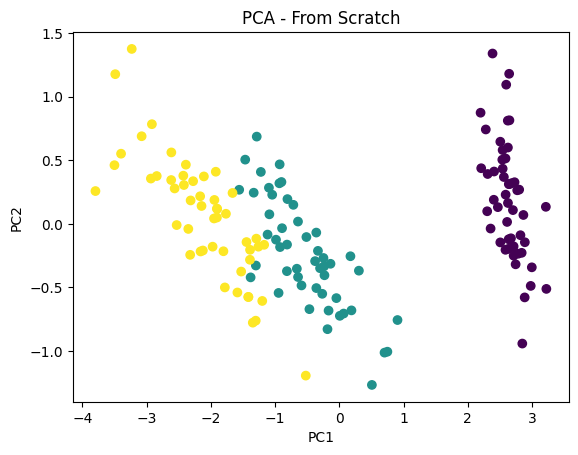

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Standardize
X_mean = X - np.mean(X, axis=0)

# Covariance matrix
cov_matrix = np.cov(X_mean.T)

# Eigen decomposition
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors
sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_idx]
eig_vecs = eig_vecs[:, sorted_idx]

# Project onto top 2 components
X_pca = X_mean @ eig_vecs[:, :2]

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - From Scratch')
plt.show()


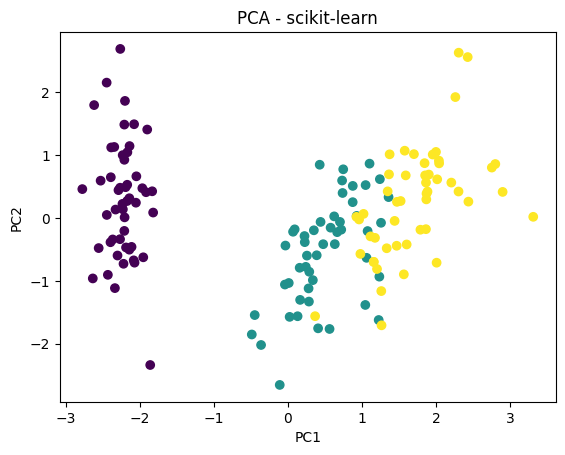

Explained variance ratio: [0.72962445 0.22850762]


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca_lib = pca.fit_transform(X_scaled)

# Plot
plt.scatter(X_pca_lib[:, 0], X_pca_lib[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - scikit-learn')
plt.show()

# Variance explained
print("Explained variance ratio:", pca.explained_variance_ratio_)


## Further Topics to Explore

1. Kernel PCA for nonlinear dimensionality reduction
2. Whitening with PCA (decorrelation of features)
3. Incremental PCA for large datasets
4. Comparison with t-SNE and UMAP
5. PCA as a pre-step to clustering or classification

Let me know if you'd like to explore any of these next.
